# 1.- Data Set Load and Data Cleaning

## import python libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

%run lib.ipynb


## reading dataset

In [59]:
data = pd.read_excel("BBDD_Hospitalización.xlsx")
print(f'There are {data.shape[0]} Rows and {data.shape[1]} Columns\n')
data.info()

There are 570 Rows and 20 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO 

## Looking for null values

In [60]:
print_missing_values_table(data)

,Not Null,Missing Values,% of Total Values,Data Type
AGENTE AISLADO,551,19,3.333,object
PSA,564,6,1.053,float64
HOSPITALIZACION,565,5,0.877,object
BIOPSIAS PREVIAS,566,4,0.702,object
ENF. CRONICA PULMONAR OBSTRUCTIVA,566,4,0.702,object
VOLUMEN PROSTATICO,567,3,0.526,object
CUP,567,3,0.526,object
EDAD,568,2,0.351,float64
ITU,568,2,0.351,object
DIAS HOSPITALIZACION MQ,568,2,0.351,float64


### Drop rows where the "EDAD" are missing

In [61]:
data.dropna(subset=['EDAD'], inplace=True)
print_missing_values_table(data)

,Not Null,Missing Values,% of Total Values,Data Type
AGENTE AISLADO,551,17,2.993,object
PSA,564,4,0.704,float64
HOSPITALIZACION,565,3,0.528,object
BIOPSIAS PREVIAS,566,2,0.352,object
ENF. CRONICA PULMONAR OBSTRUCTIVA,566,2,0.352,object
VOLUMEN PROSTATICO,567,1,0.176,object
CUP,567,1,0.176,object


### Set "NO" where "AGENTE AISLADO" is missing and "ITU" is "NO"

In [62]:
data['AGENTE AISLADO'] = np.where(((data['AGENTE AISLADO'].isnull()) & (data['ITU'] == 'NO')), 'NO', data['AGENTE AISLADO'])
print_missing_values_table(data)

,Not Null,Missing Values,% of Total Values,Data Type
PSA,564,4,0.704,float64
HOSPITALIZACION,565,3,0.528,object
BIOPSIAS PREVIAS,566,2,0.352,object
ENF. CRONICA PULMONAR OBSTRUCTIVA,566,2,0.352,object
VOLUMEN PROSTATICO,567,1,0.176,object
CUP,567,1,0.176,object


In [63]:
#display all rows where "PSA" is missing
data[data['PSA'].isnull()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
121,62.0,NO,NO,NaN,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


### Set mean of PSA to missing values

In [64]:
#set mean of PSA to missing values
data['PSA'] = np.where(data['PSA'].isnull(), data['PSA'].mean(), data['PSA'])
print_missing_values_table(data)

,Not Null,Missing Values,% of Total Values,Data Type
HOSPITALIZACION,565,3,0.528,object
BIOPSIAS PREVIAS,566,2,0.352,object
ENF. CRONICA PULMONAR OBSTRUCTIVA,566,2,0.352,object
VOLUMEN PROSTATICO,567,1,0.176,object
CUP,567,1,0.176,object


### Set "NO" where "HOSPITALIZACION" is missing and "DIAS HOSPITALIZACION MQ" and "DIAS HOSPITALIZACION UPC" are 0

In [65]:
#display all rows where "HOSPITALIZACION" is missing
data[data['HOSPITALIZACION'].isnull()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
31,63.0,NO,NO,10.8,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
100,74.0,NO,NO,5.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
109,61.0,NO,NO,7.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0


In [66]:
data['HOSPITALIZACION'] = np.where((data['HOSPITALIZACION'].isnull() & (data['DIAS HOSPITALIZACION MQ'] == 0) & (data['DIAS HOSPITALIZACIÓN UPC'] == 0)), 'NO', data['HOSPITALIZACION'])
print_missing_values_table(data)

,Not Null,Missing Values,% of Total Values,Data Type
BIOPSIAS PREVIAS,566,2,0.352,object
ENF. CRONICA PULMONAR OBSTRUCTIVA,566,2,0.352,object
VOLUMEN PROSTATICO,567,1,0.176,object
CUP,567,1,0.176,object


### Remove rows with missing values

In [67]:
#Remove files with missing values
data.dropna(inplace=True)
print_missing_values_table(data)

,Not Null,Missing Values,% of Total Values,Data Type


In [68]:
print(f'There are {data.shape[0]} Rows and {data.shape[1]} Columns\n')
data.info()

There are 564 Rows and 20 Columns

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 564
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       564 non-null    float64
 1   DIABETES                                                                   564 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 564 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           564 non-null    object 
 5   VOLUMEN PROSTATICO                                                         564 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA

## Duplicated rows



### We can't identify duplicated rows, because we don't have any unique identifiers. The AGE of the patient it's not sufficient to identify duplicated rows.

## Looking for irrelevant columns

In [69]:
## Categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f'Column: {col}\n{data[col].value_counts()}\n')
    print(f'Column: {col}\n{data[col].nunique()} sublevels\n')


Column: DIABETES
DIABETES
NO    501
SI     63
Name: count, dtype: int64

Column: DIABETES
2 sublevels

Column: HOSPITALIZACIÓN ULTIMO MES
HOSPITALIZACIÓN ULTIMO MES
NO    559
SI      5
Name: count, dtype: int64

Column: HOSPITALIZACIÓN ULTIMO MES
2 sublevels

Column: BIOPSIAS PREVIAS
BIOPSIAS PREVIAS
NO    509
SI     55
Name: count, dtype: int64

Column: BIOPSIAS PREVIAS
2 sublevels

Column: VOLUMEN PROSTATICO
VOLUMEN PROSTATICO
SI    405
NO    159
Name: count, dtype: int64

Column: VOLUMEN PROSTATICO
2 sublevels

Column: ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_AMINOGLICOSIDO    444
CEFALOSPORINA_AMINOGLUCOCIDO       56
OTROS                              42
OROQUINOLONAS                      18
FLUOROQUINOLONA_AMINOGLICÓSIDO      4
Name: count, dtype: int64

Column: ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
5 sublevels

Column: CUP
CUP
NO    560
SI      4
Name: count, dtype: int64

Column: CUP
2 sublevels

Column: ENF. CRONICA PULMO

### All columns are categorical and have more than one unique value. We doesn't need to remove columns

In [70]:
## Numerical columns
num_cols = data.select_dtypes(exclude=['object']).columns
for col in num_cols:
    print(f'Column: {col}\n{data[col].describe()}\n')

Column: EDAD
count    564.000000
mean      63.886525
std        9.305429
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max      151.000000
Name: EDAD, dtype: float64

Column: PSA
count    564.000000
mean      13.313698
std       15.660170
min        0.600000
25%        5.675000
50%        8.000000
75%       15.000000
max      100.000000
Name: PSA, dtype: float64

Column: NUMERO DE MUESTRAS TOMADAS
count    564.000000
mean      12.989362
std        3.923318
min        4.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       24.000000
Name: NUMERO DE MUESTRAS TOMADAS, dtype: float64

Column: DIAS HOSPITALIZACION MQ
count    564.000000
mean       0.166667
std        0.961361
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       12.000000
Name: DIAS HOSPITALIZACION MQ, dtype: float64

Column: DIAS HOSPITALIZACIÓN UPC
count    564.000000
mean       0.014184
std        0.197167
min        0.000000
25%

## Outlayer values

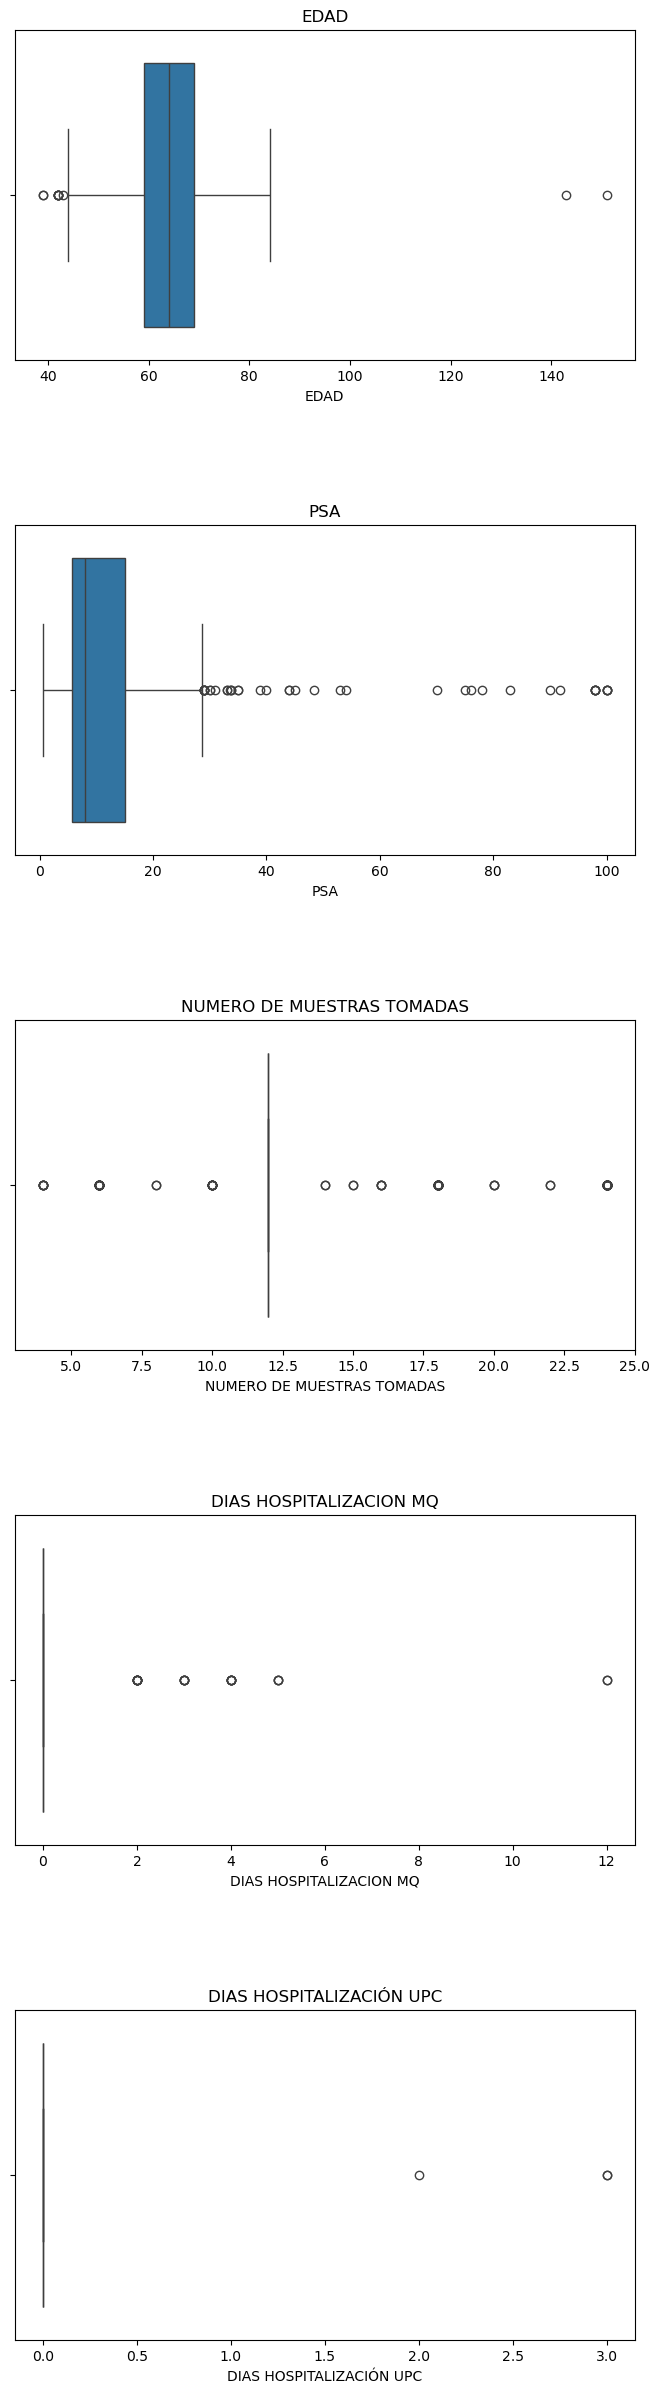

In [71]:
boxplot_graph(data, num_cols)

### There are AGES with values over 100. We need to rest 100 to get values between 0 and 100. (Thats thinking in typographic errors)

In [72]:
# We need to rest 100 to get values between 0 and 100 in EDAD column
data['EDAD'] = np.where(data['EDAD'] > 100, data['EDAD'] - 100, data['EDAD'])
print(f'Column: {col}\n{data["EDAD"].describe()}\n')

Column: DIAS HOSPITALIZACIÓN UPC
count    564.000000
mean      63.531915
std        7.933384
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max       84.000000
Name: EDAD, dtype: float64



## Typographic errors in categorical columns

/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be 

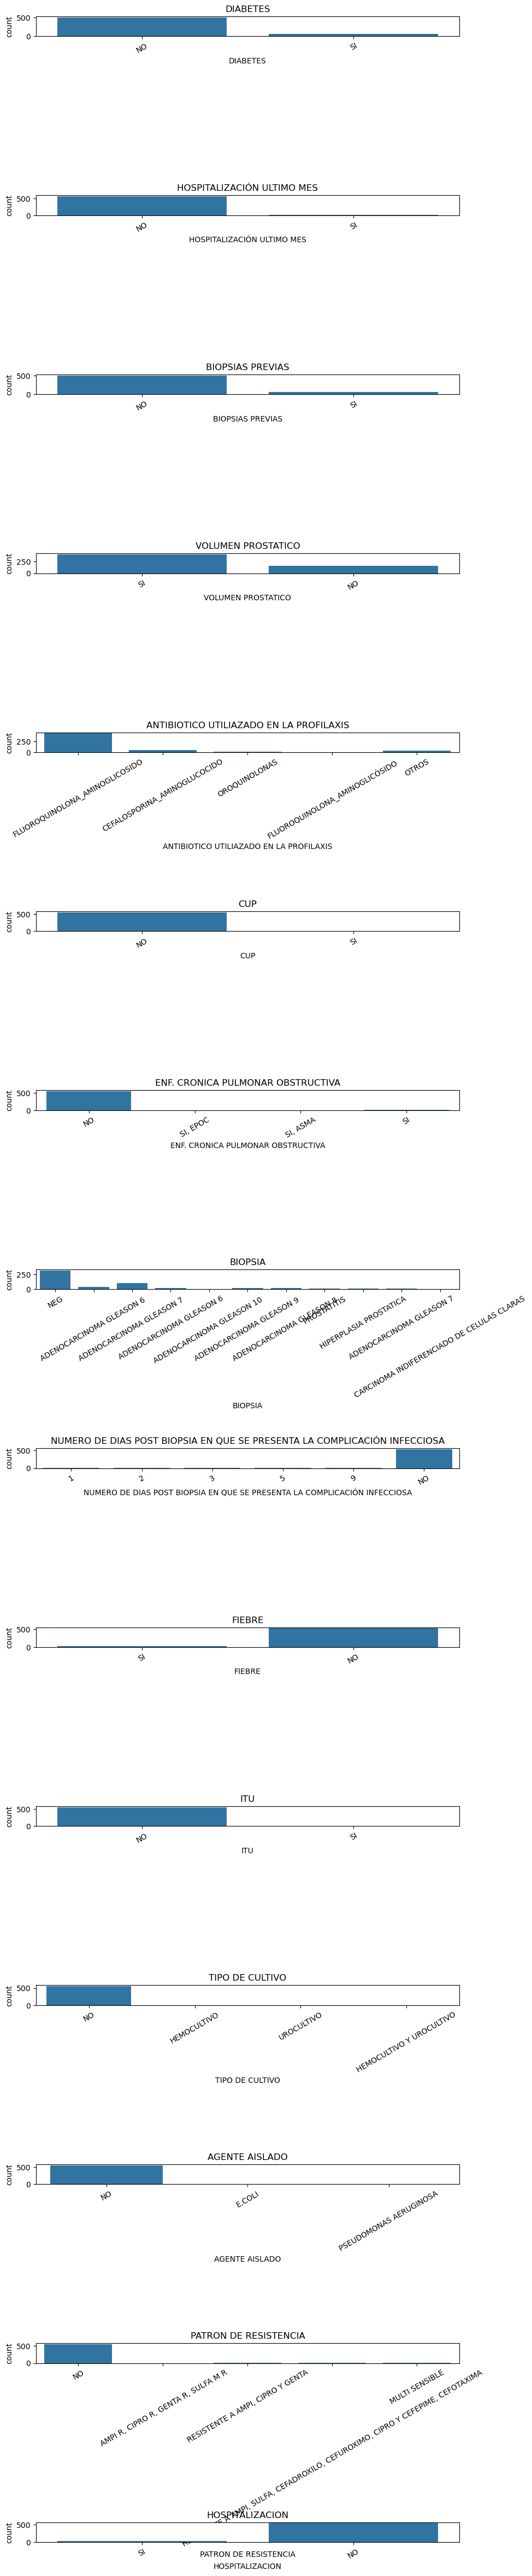

In [73]:
count_plot(data, cat_cols)

### For ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS, we have "FLUOROQUINOLONA_AMINOGLICOSIDO" and " FLUOROQUINOLONA_AMINOGLICÓSIDO". We can change the Ó with O

In [74]:
print(data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].unique())
data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].str.replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')
print(data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].unique())

['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'FLUOROQUINOLONA_AMINOGLICÓSIDO' 'OTROS']
['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'OTROS']


### For "BIOPSIA" column, we have values with and without spaces at the end. We can remove the spaces.

In [75]:
print(data['BIOPSIA'].unique())
data['BIOPSIA'] = data['BIOPSIA'].str.strip()
print(data['BIOPSIA'].unique())

['NEG' 'ADENOCARCINOMA GLEASON 6 ' 'ADENOCARCINOMA GLEASON 7 '
 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 10 '
 'ADENOCARCINOMA GLEASON 9 ' 'ADENOCARCINOMA GLEASON 8 ' 'PROSTATITIS'
 'HIPERPLASIA PROSTATICA' 'ADENOCARCINOMA GLEASON 7'
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']
['NEG' 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 7'
 'ADENOCARCINOMA GLEASON 10' 'ADENOCARCINOMA GLEASON 9'
 'ADENOCARCINOMA GLEASON 8' 'PROSTATITIS' 'HIPERPLASIA PROSTATICA'
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']


/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_11826/3618660585.py:28: UserWarning: set_ticklabels() should only be 

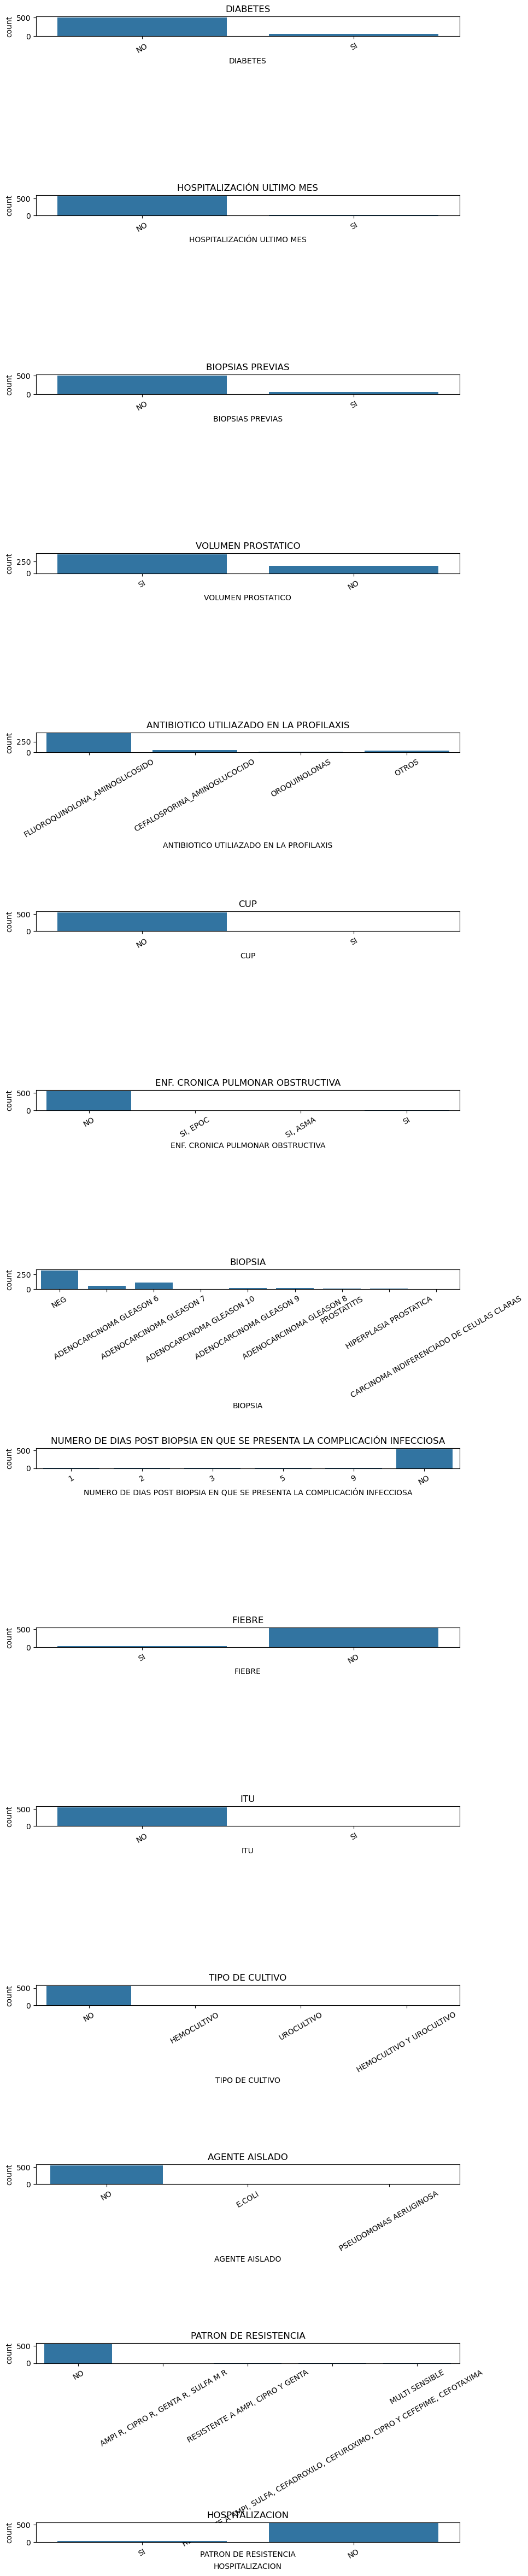

In [76]:
count_plot(data, cat_cols)

## Data cleaning finished.

In [77]:
data.shape

(564, 20)

## Save cleaned dataset to excel

In [78]:
data.to_excel('data_cleaned.xlsx', index=False)
data.to_csv('data_cleaned.csv', index=False)